# Introduction to Random Forest with Python

### First, we import h2o to deal with the datasets

In [1]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 1 hour 48 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_valentinhenriot_df7hzl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.989 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


The h2o package will then help us to perform a Random Forest on our datasets. We chose to use the h2o package rather than the Scikit-Learn package because our datasets contain many categorical variables. Scikit-Learn imposes to convert all categorical variables into numerical ones.

These datasets come from Kaggle, to clean up the dataset and predict missing values in these dataset we used the R software which we are more comfortable with at the moment. The code used to set up the data is available [here](https://github.com/ValHrt/DailyCoding/blob/master/House_Prices_Predict.Rmd).
As this is a Kaggle competition, there are two sets of data. A train dataset and a test dataset for which we have to predict values.
These datasets concern real estate sales in the United States and the aim is to find the selling price of the houses as accurately as possible. For this we will use the RandomForest algorithm.

## Downloading the data

In [2]:
dftest = h2o.import_file("House_Price_Test.csv")
dftrain = h2o.import_file("House_Price_Train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


First of all, we check that our data sets have been imported without error. To do this, we use the head() function.

In [3]:
dftrain.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TrainData
1,60,RL,65,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500,TRUE
2,20,RL,80,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500,TRUE
3,60,RL,68,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500,TRUE
4,70,RL,60,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000,TRUE
5,60,RL,84,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000,TRUE
6,50,RL,85,14115,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No,MnPrv,Shed,700,10,2009,WD,Normal,143000,TRUE
7,20,RL,75,10084,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No,No,No,0,8,2007,WD,Normal,307000,TRUE
8,60,RL,80,10382,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No,No,Shed,350,11,2009,WD,Normal,200000,TRUE
9,50,RM,51,6120,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No,No,No,0,4,2008,WD,Abnorml,129900,TRUE
10,190,RL,50,7420,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd

In [4]:
dftest.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TrainData
1461,20,RH,80,11622,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,nan,FALSE
1462,20,RL,81,14267,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,nan,FALSE
1463,60,RL,74,13830,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,nan,FALSE
1464,60,RL,78,9978,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,nan,FALSE
1465,120,RL,43,5005,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,nan,FALSE
1466,60,RL,75,10000,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,No,No,No,0,4,2010,WD,Normal,nan,FALSE
1467,20,RL,64,7980,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,No,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,No,GdPrv,Shed,500,3,2010,WD,Normal,nan,FALSE
1468,60,RL,63,8402,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,No,No,No,0,5,2010,WD,Normal,nan,FALSE
1469,20,RL,85,10176,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,No,No,No,0,2,2010,WD,Normal,nan,FALSE
1470,20,RL,70,8400,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,No,Attchd,1970,Fin,2,525,TA,T

We see that our data was well imported and that there isn't any error.

In [5]:
predictors = ["MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond","PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold","SaleType","SaleCondition"]
response = "SalePrice"

Here we have defined the variable to be predicted and the variables that will be used to predict. We have chosen not to keep the Id column because it has no mathematical interest for the algorithm.

In [6]:
train, valid = dftrain.split_frame(ratios=[.8], seed=1234)

Here we divide the dataset into two parts. A test part and a train part. We choose to use 20% of the dftrain dataset as a test dataset, i.e. we will see if we can accurately predict these 20% values. The remaining 80% will be used to train the algorithm.
The argument set.seed allows to keep the same result randomly generated by the algorithm for dividing the dataset. We choose to set set set.seed to 1234 (we could very well have chosen another number but we will use this one).

In [7]:
encoding = "auto"

Here we indicate that the categorical variables will have to be encoded for the algorithm to work.

## Random Forest Model

**Here we define the parameters of the model:** 
- We choose to create 380 trees (see next cell for explanation). 
- We indicate the type of encoding defined in the previous code. 
- We set the maximum tree depth to 50 (we choose this value because we have a lot of variables, the default value for this parameter is 20, however, choosing too high a value can lead to overfitting).
- For the last parameter we specify the minimum number of observations for a leaf. We specify this parameter on 10 in order to have a precise algorithm (the default value is 1).

In [8]:
dftrain_drf = H2ORandomForestEstimator(ntrees=380,
                                    categorical_encoding=encoding,
                                    max_depth=50,
                                    min_rows=10)
dftrain_drf.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)

/Users/valentinhenriot/opt/anaconda3/lib/python3.8/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [Utilities]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


With the function below we can see the optimal number of trees for our model. We had initially done a test with 1000 trees and saw that the model no longer improved from 380 trees. 
That is why we have chosen to keep 380 trees.
However, on a Random Forest, having more trees than necessary is not a problem for the model (unlike the GLM model for example).

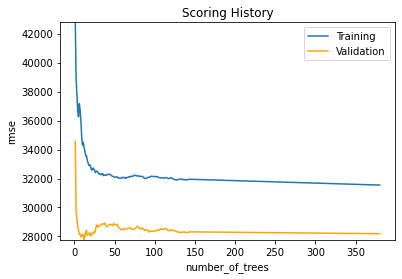

In [9]:
dftrain_drf.plot()

**Here we display information about our Random Forest model.**

In [10]:
dftrain_drf.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1606919542192_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,380.0,380.0,299586.0,8.0,14.0,10.147368,53.0,64.0,57.84737




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 995233872.5861288
RMSE: 31547.327503072727
MAE: 18064.187335987885
RMSLE: 0.15319582077104804
Mean Residual Deviance: 995233872.5861288

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 794706284.7106694
RMSE: 28190.53537467264
MAE: 17485.269478900835
RMSLE: 0.13933234058677452
Mean Residual Deviance: 794706284.7106694

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-12-03 17:20:32,0.004 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-12-03 17:20:32,0.057 sec,1.0,42768.718101,27190.910409,1.829163e+09,34559.815617,24856.617243,1.194381e+09
2,,2020-12-03 17:20:32,0.084 sec,2.0,38885.961512,25252.061573,1.512118e+09,29716.752217,20105.313021,8.830854e+08
3,,2020-12-03 17:20:32,0.099 sec,3.0,37814.810889,25030.533601,1.429960e+09,29298.236896,19834.821828,8.583867e+08
4,,2020-12-03 17:20:32,0.114 sec,4.0,36724.996932,24282.993393,1.348725e+09,28608.832116,19212.756183,8.184653e+08
5,,2020-12-03 17:20:32,0.132 sec,5.0,36255.890288,23155.515613,1.314490e+09,28461.108820,18801.771261,8.100347e+08
6,,2020-12-03 17:20:32,0.146 sec,6.0,37163.847271,22725.609094,1.381152e+09,28164.970068,18300.065769,7.932655e+08
7,,2020-12-03 17:20:32,0.163 sec,7.0,36729.836968,22482.997440,1.349081e+09,28185.410602,18204.706590,7.944174e+08
8,,2020-12-03 17:20:32,0.181 sec,8.0,35954.281915,22029.408844,1.292710e+09,27970.758571,18058.623900,7.823633e+08
9,,2020-12-03 17:20:32,0.200 sec,9.0,34855.880668,21473.293914,1.214932e+09,28019.246568,18189.816700,7.850782e+08



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,OverallQual,5.449617e+14,1.000000,0.282600
1,ExterQual,2.664828e+14,0.488994,0.138190
2,GarageCars,2.195932e+14,0.402952,0.113874
3,Neighborhood,2.146513e+14,0.393883,0.111311
4,GrLivArea,1.845424e+14,0.338634,0.095698
5,KitchenQual,8.026546e+13,0.147286,0.041623
6,TotalBsmtSF,6.612418e+13,0.121337,0.034290
7,1stFlrSF,5.657948e+13,0.103823,0.029340
8,BsmtQual,4.917727e+13,0.090240,0.025502
9,BsmtFinSF1,3.509892e+13,0.064406,0.018201



See the whole table with table.as_data_frame()


We display the most important variables in our model. We can see that it is the OverallQual variable (overall quality of the house) that has the most influence on SalePrice.

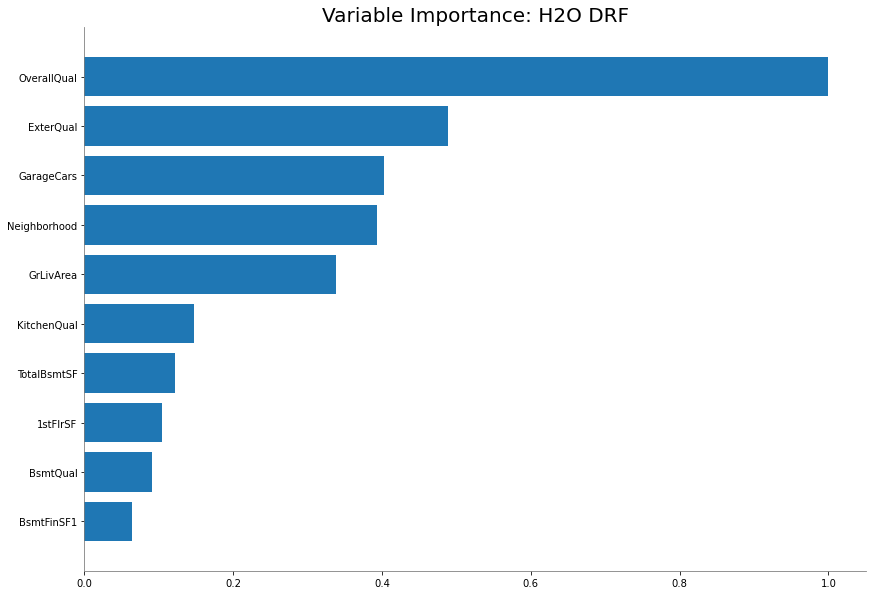

In [11]:
dftrain_drf.varimp_plot()

In [14]:
dftrain["PricePredicted"] = dftrain_drf.predict(dftrain)

drf prediction progress: |████████████████████████████████████████████████| 100%


*We apply our model to the dftrain dataset to look at the difference between predicted and actual values.*

In [16]:
dftrain["SalePrice"].mean()

[180921.19589041095]

In [17]:
dftrain["PricePredicted"].mean()

[181125.1473531002]

We can see that there is little difference in the average of the predicted and actual values, which is a good sign for our model.

In [12]:
dftest["SalePrice"] = dftrain_drf.predict(dftest)

drf prediction progress: |████████████████████████████████████████████████| 100%


/Users/valentinhenriot/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'PoolQC' has levels not trained on: ["TA"]
  warnings.warn(w)


Finally, we apply our model to the test dataset (the one whose values we need to predict for the SalePrice variable).

In [13]:
print(dftest["SalePrice"])

SalePrice
124934
150218
182996
186350
204438
182484
170348
177491
176756
129101


We use the print function to check the first 10 predicted values (and thus see if the values are consistent).

Then we keep only the Id and SalePrice columns of our dftest dataset to be able to make a submission on Kaggle and thus check the performance of our Random Forest model.

In [21]:
KaggleSubmission = dftest[['Id', 'SalePrice']]

In [25]:
import pandas as pd
KaggleSubmission_as_df = h2o.as_list(KaggleSubmission)

We transform our dataset into a data frame so that it can be exported to csv via Pandas.

In [26]:
KaggleSubmission_as_df.to_csv("KaggleSub.csv", index=False)

In [27]:
print(KaggleSubmission_as_df)

        Id      SalePrice
0     1461  124933.745662
1     1462  150217.589391
2     1463  182995.809067
3     1464  186350.487623
4     1465  204438.084868
...    ...            ...
1454  2915   89598.591674
1455  2916   93968.049445
1456  2917  156195.666591
1457  2918  121536.975863
1458  2919  201381.115049

[1459 rows x 2 columns]


![title](KaggleScore.png)

## Conclusion

We rank 2742nd out of 4927 with our RandomForest model. The score given to us by Kaggle is 0.14744 (an average error in our algorithm of 14.744%).

To improve the model, we could have reviewed the methods used to predict missing values in the initial dataset or used other algorithms in addition to RandomForest for greater accuracy. However, this result is still appropriate as the estimators of property prices in France give a range of prices varying on average from 10 to 15%.